<a href="https://colab.research.google.com/github/SaiVirinchi/Montecarlo/blob/master/Weighted_Montecarlo_simulation_of_Neutron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib notebook
from scipy import random as sciran
import random
from scipy import stats
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def free_path():
    min = 0
    max = 1
    xrand = sciran.uniform(min,max)
    #value of parameter
    k = 1/sigma_t

    s = -k*np.log(xrand)
    return s

In [3]:
def collision():
    ab = sciran.uniform(0,1)
    if ab <= sigma_a/sigma_t:
      return True
    else:
      return False
    

In [4]:
def new_angle():
    ang = sciran.uniform(0,pi)
    return ang

In [5]:
def update_location(rnew,rold,anew):
    rfresh = rold + rnew*np.cos(anew)
    return rfresh

In [6]:
def boundary(rfresh):
    if rfresh > half_length:
      return 5
    elif rfresh < 0:
      return 4

In [7]:
def cycle(): 


  #SOURCE

  position = 0
  angle = 0
  weight = 1

  global right
  global left
  global absorb

  #TRANSITION
  while True:
    freepath = free_path()
    position = update_location(freepath,position,angle)

    if boundary(position) == 4:
      left = left + weight
      #print("out2",left)
      return
    elif boundary(position) == 5:
      right = right + weight
      #print("out3",right)
      return 
    
    weight = weight*((sigma_t-sigma_a)/(sigma_t))

    absorb = absorb + weight*(sigma_a/sigma_t)
    angle = new_angle()
  
  

In [8]:
def simul(): 
  
  for i in range(N):
    cycle()

  global Data 
  Data = np.append(Data,[[left,right,absorb]],0)
    

In [9]:


def plott(M):
  param = stats.norm.fit(M) # distribution fitting

  # now, param[0] and param[1] are the mean and 
  # the standard deviation of the fitted distribution
  #x = linspace(-5,5,100)
  domain = np.linspace(np.min(M),np.max(M))
  x = domain
  # fitted distribution
  pdf_fitted = stats.norm.pdf(domain,loc=param[0],scale=param[1])
  # original distribution
  pdf = stats.norm.pdf(x)

  plt.title('Normal distribution')
  plt.plot(x,pdf_fitted,)
  plt.hist(M,domain,ec='black',density=1,alpha=.3)
  plt.show()

0.3007959686968763


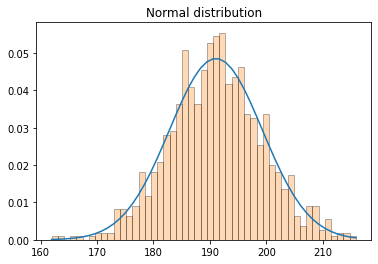

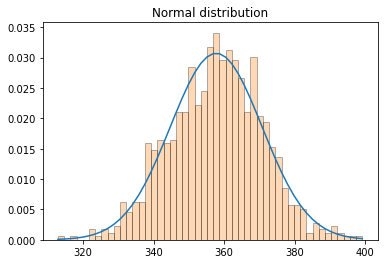

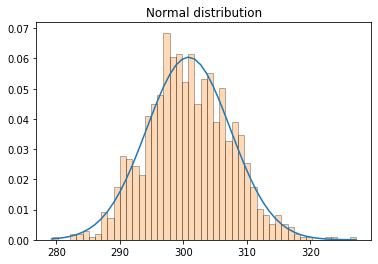

In [10]:
#global variables
sigma_t = 3 #Σt
sigma_a = 1 #Σa ratio
interation = 1000
half_length = 0.5

pi = np.pi

N = interation 

Data = [[0,0,0]]



for j in range(1000):
  right = 0
  left = 0
  absorb = 0
  simul()

Data = np.delete(Data,0,0)

Left_mean = np.mean(Data[:,0])
Right_mean = np.mean(Data[:,1])
Absorb_mean = np.mean(Data[:,2])
Left_var = np.var(Data[:,0])
Right_var = np.var(Data[:,1])
Absorb_var = np.var(Data[:,2])

Ratio_abs = Absorb_mean/1000  

print(Ratio_abs)

for w in range(3):
  plott(Data[:,w])
